In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [41]:
dirs = os.listdir(path)
file = "/CollectedData_Pranav.csv"
filename = path+'/'+dirs[0]+file
df = pd.read_csv(filename, header=header, index_col=0)
for d in dirs:
    filename = path+'/'+d+file
    df1 =  pd.read_csv(filename, header=header, index_col=0)
    df = df.append(df1) 
df

scorer                          Pranav                                      \
bodyparts                        snout           leftear          rightear   
coords                               x        y        x        y        x   
labeled-data/m1s1/img0000.png   19.333  388.333   29.667  396.000   22.000   
labeled-data/m1s1/img0001.png   18.667  357.000   25.333  369.000   24.000   
labeled-data/m1s1/img0002.png   16.000  404.000   25.333  411.667   20.000   
labeled-data/m1s1/img0003.png   16.000  417.333   23.000  431.000   20.333   
labeled-data/m1s1/img0004.png   16.333  424.667   26.667  437.000   22.333   
...                                ...      ...      ...      ...      ...   
labeled-data/m8s1/img0067.png  230.769  387.180  241.880  419.658  236.752   
labeled-data/m8s1/img0068.png  223.077  415.385  236.752  435.897  224.786   
labeled-data/m8s1/img0069.png  235.897  442.735  253.846  455.556  235.043   
labeled-data/m8s1/img0070.png  226.496  417.094  258.974  443.590  242.735   
labeled-data/m8s1/img0071.png  229.915  382.906  258.974  424.786  256.410   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m1s1/img0000.png  379.000  115.667  346.667  
labeled-data/m1s1/img0001.png  347.000  126.333  367.667  
labeled-data/m1s1/img0002.png  392.333  110.000  373.667  
labeled-data/m1s1/img0003.png  407.667  110.333  407.333  
labeled-data/m1s1/img0004.png  414.333  112.333  421.667  
...                                ...      ...      ...  
labeled-data/m8s1/img0067.png  379.487  466.667  423.077  
labeled-data/m8s1/img0068.png  398.291  451.282  415.385  
labeled-data/m8s1/img0069.png  423.932  458.120  403.419  
labeled-data/m8s1/img0070.png  390.598  482.051  407.692  
labeled-data/m8s1/img0071.png  367.521  496.581  411.966  

[1182 rows x 8 columns]

In [42]:
def read_data(path, header):
    dirs = os.listdir(path)
    file = "/CollectedData_Pranav.csv"
    filename = path+'/'+dirs[0]+file
    df = pd.read_csv(filename, header=header, index_col=0)
    for d in dirs:
        filename = path+'/'+d+file
        df1 =  pd.read_csv(filename, header=header, index_col=0)
        df = df.append(df1) 
    
    return df

In [4]:
def add_noise(df,scorer,bodypart,coord,n, m, noise):
    num = n+m
    df.loc[filenames[n:num],(scorer, bodypart, coord)] = df.loc[filenames[n:num],(scorer, bodypart, coord)] + np.abs(np.random.normal(0, 1, m)) * noise
    return df

In [5]:
def swap_ears(df,df_fake,scorer,n):
    df_fake.loc[filenames[:n],(scorer, 'leftear', 'x')] = df.loc[filenames[:n],(scorer, 'rightear', 'x')]
    df_fake.loc[filenames[:n],(scorer, 'leftear', 'y')] = df.loc[filenames[:n],(scorer, 'rightear', 'y')]
    
    df_fake.loc[filenames[:n],(scorer, 'rightear', 'x')] = df.loc[filenames[:n],(scorer, 'leftear', 'x')]
    df_fake.loc[filenames[:n],(scorer, 'rightear', 'y')] = df.loc[filenames[:n],(scorer, 'leftear', 'y')]
    return df_fake

In [6]:
def comp_dist(features,df, scorer, bodypart1, bodypart2):
    name = bodypart1 + '_' + bodypart2
    features[name] = np.sqrt(np.square(df[scorer,bodypart1, 'x'] - df[scorer,bodypart2, 'x'])+np.square(df[scorer,bodypart1, 'y'] - df[scorer, bodypart2, 'y']))
    
    return features

In [7]:
# calculate the angle sign between 3 keypoints (if negative, swapping might have occured)
def get_angle(name,features,df, scorer, bodypart3, bodypart2, bodypart1):
    features[name] = np.degrees(np.arctan2(df[scorer, bodypart3, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart3, 'x']-df[scorer,bodypart2, 'x']) - np.arctan2(df[scorer, bodypart1, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart1, 'x']-df[scorer,bodypart2, 'x']))
    return features

In [8]:
# calculate the angle sign between 3 keypoints (if negative, swapping might have occured)
def get_anglesign(name,features,df, scorer, bodypart3, bodypart2, bodypart1):
    features[name] = np.sign(np.degrees(np.arctan2(df[scorer, bodypart3, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart3, 'x']-df[scorer,bodypart2, 'x']) - np.arctan2(df[scorer, bodypart1, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart1, 'x']-df[scorer,bodypart2, 'x'])))
    return features

In [9]:
# plot indices
def plot_ind(x_data,y_data,labels,cluster_n):
    pic_num = np.array(np.where(labels==cluster_n))
    for i in pic_num[0,:]:
        plt.text(x_data[i]+0.1,y_data[i],i)
    return 

In [43]:
path = 'C:/Users/User/Anna/Clustering/mouse/openfield-Pranav-2018-08-20/labeled-data'
header = [0, 1, 2] ### if multi-animal project, header = [0, 1, 2, 3]

df = read_data(path, header)
df

scorer                          Pranav                                      \
bodyparts                        snout           leftear          rightear   
coords                               x        y        x        y        x   
labeled-data/m1s1/img0000.png   19.333  388.333   29.667  396.000   22.000   
labeled-data/m1s1/img0001.png   18.667  357.000   25.333  369.000   24.000   
labeled-data/m1s1/img0002.png   16.000  404.000   25.333  411.667   20.000   
labeled-data/m1s1/img0003.png   16.000  417.333   23.000  431.000   20.333   
labeled-data/m1s1/img0004.png   16.333  424.667   26.667  437.000   22.333   
...                                ...      ...      ...      ...      ...   
labeled-data/m8s1/img0067.png  230.769  387.180  241.880  419.658  236.752   
labeled-data/m8s1/img0068.png  223.077  415.385  236.752  435.897  224.786   
labeled-data/m8s1/img0069.png  235.897  442.735  253.846  455.556  235.043   
labeled-data/m8s1/img0070.png  226.496  417.094  258.974  443.590  242.735   
labeled-data/m8s1/img0071.png  229.915  382.906  258.974  424.786  256.410   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m1s1/img0000.png  379.000  115.667  346.667  
labeled-data/m1s1/img0001.png  347.000  126.333  367.667  
labeled-data/m1s1/img0002.png  392.333  110.000  373.667  
labeled-data/m1s1/img0003.png  407.667  110.333  407.333  
labeled-data/m1s1/img0004.png  414.333  112.333  421.667  
...                                ...      ...      ...  
labeled-data/m8s1/img0067.png  379.487  466.667  423.077  
labeled-data/m8s1/img0068.png  398.291  451.282  415.385  
labeled-data/m8s1/img0069.png  423.932  458.120  403.419  
labeled-data/m8s1/img0070.png  390.598  482.051  407.692  
labeled-data/m8s1/img0071.png  367.521  496.581  411.966  

[1182 rows x 8 columns]

In [69]:
df = df.dropna()
df

scorer                          Pranav                                      \
bodyparts                        snout           leftear          rightear   
coords                               x        y        x        y        x   
labeled-data/m1s1/img0000.png   19.333  388.333   29.667  396.000   22.000   
labeled-data/m1s1/img0001.png   18.667  357.000   25.333  369.000   24.000   
labeled-data/m1s1/img0002.png   16.000  404.000   25.333  411.667   20.000   
labeled-data/m1s1/img0003.png   16.000  417.333   23.000  431.000   20.333   
labeled-data/m1s1/img0004.png   16.333  424.667   26.667  437.000   22.333   
...                                ...      ...      ...      ...      ...   
labeled-data/m8s1/img0067.png  230.769  387.180  241.880  419.658  236.752   
labeled-data/m8s1/img0068.png  223.077  415.385  236.752  435.897  224.786   
labeled-data/m8s1/img0069.png  235.897  442.735  253.846  455.556  235.043   
labeled-data/m8s1/img0070.png  226.496  417.094  258.974  443.590  242.735   
labeled-data/m8s1/img0071.png  229.915  382.906  258.974  424.786  256.410   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m1s1/img0000.png  379.000  115.667  346.667  
labeled-data/m1s1/img0001.png  347.000  126.333  367.667  
labeled-data/m1s1/img0002.png  392.333  110.000  373.667  
labeled-data/m1s1/img0003.png  407.667  110.333  407.333  
labeled-data/m1s1/img0004.png  414.333  112.333  421.667  
...                                ...      ...      ...  
labeled-data/m8s1/img0067.png  379.487  466.667  423.077  
labeled-data/m8s1/img0068.png  398.291  451.282  415.385  
labeled-data/m8s1/img0069.png  423.932  458.120  403.419  
labeled-data/m8s1/img0070.png  390.598  482.051  407.692  
labeled-data/m8s1/img0071.png  367.521  496.581  411.966  

[1178 rows x 8 columns]

In [70]:
filenames = df.index
scorer = 'Pranav'

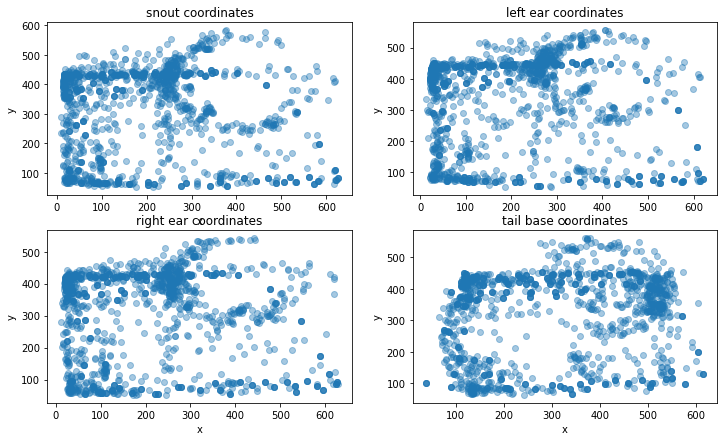

In [71]:
# data visualization

fig, axs = plt.subplots(2, 2, figsize=(12, 7))
axs[0, 0].scatter(df.loc[filenames[:],(scorer, 'snout', 'x')], df.loc[filenames[:],(scorer, 'snout', 'y')], alpha=0.4)
axs[0, 0].set_title ("snout coordinates")

axs[0, 1].scatter(df.loc[filenames[:],(scorer, 'leftear', 'x')], df.loc[filenames[:],(scorer, 'leftear', 'y')], alpha=0.4)
axs[0, 1].set_title ("left ear coordinates")

axs[1, 0].scatter(df.loc[filenames[:],(scorer, 'rightear', 'x')], df.loc[filenames[:],(scorer, 'rightear', 'y')], alpha=0.4)
axs[1, 0].set_title ("right ear coordinates")

axs[1, 1].scatter(df.loc[filenames[:],(scorer, 'tailbase', 'x')], df.loc[filenames[:],(scorer, 'tailbase', 'y')], alpha=0.4)
axs[1, 1].set_title ("tail base coordinates")

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')




In [72]:
df_features = pd.DataFrame()

df_features = comp_dist(df_features,df, scorer,'leftear', 'rightear')
df_features = comp_dist(df_features,df, scorer,'snout', 'tailbase')

df_features = comp_dist(df_features,df, scorer,'snout', 'leftear')
df_features = comp_dist(df_features,df, scorer,'snout', 'rightear')

df_features = comp_dist(df_features,df, scorer,'tailbase', 'leftear')
df_features = comp_dist(df_features,df, scorer,'tailbase', 'rightear')


df_features.head()

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear
labeled-data/m1s1/img0000.png,18.648938,104.958540,12.867573,9.706584,99.145070,99.090513
labeled-data/m1s1/img0001.png,22.040347,108.193126,13.727183,11.333176,101.008796,104.399079
labeled-data/m1s1/img0002.png,20.056033,98.772926,12.078401,12.333649,92.803561,91.915285
labeled-data/m1s1/img0003.png,23.484927,94.861556,15.355354,10.592754,90.483036,90.000620
labeled-data/m1s1/img0004.png,23.077618,96.046864,16.090197,11.949542,87.027378,90.298325


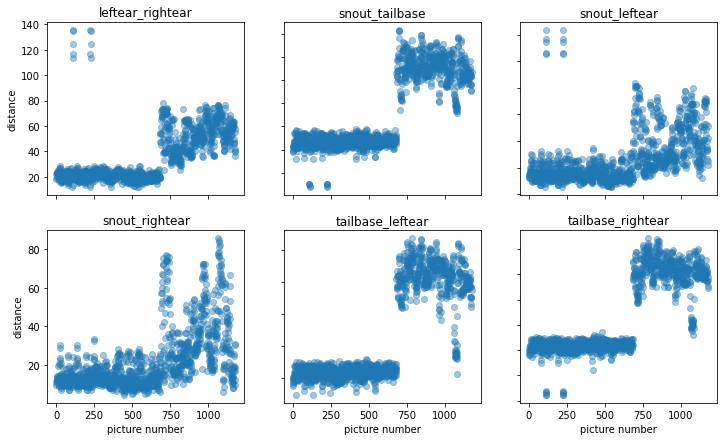

In [73]:
# visualization of distances

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
ind = range(df.shape[0])
axs[0, 0].scatter(ind, df_features['leftear_rightear'], alpha=0.4)
axs[0, 0].set_title ("leftear_rightear")

axs[0, 1].scatter(ind, df_features['snout_tailbase'], alpha=0.4)
axs[0, 1].set_title ("snout_tailbase")

axs[0, 2].scatter(ind, df_features['snout_leftear'], alpha=0.4)
axs[0, 2].set_title ("snout_leftear")

axs[1, 0].scatter(ind, df_features['snout_rightear'], alpha=0.4)
axs[1, 0].set_title ("snout_rightear")

axs[1, 1].scatter(ind, df_features['tailbase_leftear'], alpha=0.4)
axs[1, 1].set_title ("tailbase_leftear")

axs[1, 2].scatter(ind, df_features['tailbase_rightear'], alpha=0.4)
axs[1, 2].set_title ("tailbase_rightear")

for ax in axs.flat:
    ax.set(xlabel='picture number', ylabel='distance')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [74]:
df_features = get_anglesign('anglesign',df_features,df, scorer, 'leftear', 'snout', 'rightear')
df_features.head()

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign
labeled-data/m1s1/img0000.png,18.648938,104.958540,12.867573,9.706584,99.145070,99.090513,1.0
labeled-data/m1s1/img0001.png,22.040347,108.193126,13.727183,11.333176,101.008796,104.399079,1.0
labeled-data/m1s1/img0002.png,20.056033,98.772926,12.078401,12.333649,92.803561,91.915285,1.0
labeled-data/m1s1/img0003.png,23.484927,94.861556,15.355354,10.592754,90.483036,90.000620,1.0
labeled-data/m1s1/img0004.png,23.077618,96.046864,16.090197,11.949542,87.027378,90.298325,1.0


In [75]:
df_features = get_angle('angle',df_features,df, scorer, 'leftear', 'snout', 'rightear')
df_features.head()

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
labeled-data/m1s1/img0000.png,18.648938,104.958540,12.867573,9.706584,99.145070,99.090513,1.0,110.624626
labeled-data/m1s1/img0001.png,22.040347,108.193126,13.727183,11.333176,101.008796,104.399079,1.0,122.876828
labeled-data/m1s1/img0002.png,20.056033,98.772926,12.078401,12.333649,92.803561,91.915285,1.0,110.478744
labeled-data/m1s1/img0003.png,23.484927,94.861556,15.355354,10.592754,90.483036,90.000620,1.0,128.733892
labeled-data/m1s1/img0004.png,23.077618,96.046864,16.090197,11.949542,87.027378,90.298325,1.0,109.900089


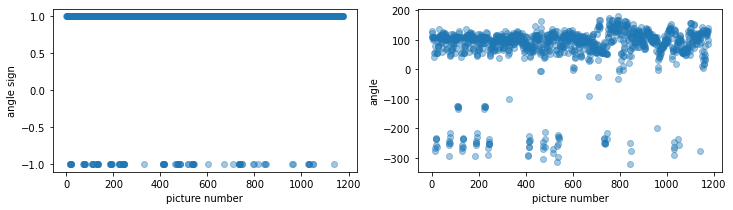

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
ind = range(df.shape[0])
axs[0].scatter(ind, df_features['anglesign'], alpha=0.4)
axs[0].set (ylabel="angle sign")

axs[1].scatter(ind, df_features['angle'], alpha=0.4)
axs[1].set (ylabel="angle")

for ax in axs.flat:
    ax.set(xlabel='picture number')

In [77]:
(df_features['anglesign'] < 0).sum()
print(df_features.loc[(df_features['anglesign'] < 0),'anglesign'])

labeled-data/m1s1/img0015.png   -1.0
labeled-data/m1s1/img0016.png   -1.0
labeled-data/m1s1/img0017.png   -1.0
labeled-data/m1s1/img0018.png   -1.0
labeled-data/m1s1/img0019.png   -1.0
                                ... 
labeled-data/m7s2/img0071.png   -1.0
labeled-data/m7s2/img0072.png   -1.0
labeled-data/m7s3/img0017.png   -1.0
labeled-data/m7s3/img0018.png   -1.0
labeled-data/m8s1/img0034.png   -1.0
Name: anglesign, Length: 99, dtype: float64


In [78]:
bodypart = 'tailbase'
n = len(filenames) // 5 # 1/5 pictures with swap ears
m = len(filenames) // 5 # 1/5 pictures with fake noise

In [79]:
print('pictures with swap ears', n)
print('pictures with fake noise', m)

pictures with swap ears 235
pictures with fake noise 235


In [80]:
#swap ears
fake_data = df.copy(deep=True)
fake_data = swap_ears(df,fake_data,scorer,n)
fake_data.head(25)

scorer                          Pranav                                      \
bodyparts                        snout           leftear          rightear   
coords                               x        y        x        y        x   
labeled-data/m1s1/img0000.png   19.333  388.333   22.000  379.000   29.667   
labeled-data/m1s1/img0001.png   18.667  357.000   24.000  347.000   25.333   
labeled-data/m1s1/img0002.png   16.000  404.000   20.000  392.333   25.333   
labeled-data/m1s1/img0003.png   16.000  417.333   20.333  407.667   23.000   
labeled-data/m1s1/img0004.png   16.333  424.667   22.333  414.333   26.667   
labeled-data/m1s1/img0005.png   18.000  430.333   25.000  418.667   30.333   
labeled-data/m1s1/img0006.png   16.333  408.667   24.333  399.333   25.667   
labeled-data/m1s1/img0007.png   14.000  391.000   23.333  380.000   21.333   
labeled-data/m1s1/img0008.png   17.000  427.333   21.667  416.000   26.000   
labeled-data/m1s1/img0009.png   19.000  433.667   28.000  424.000   30.000   
labeled-data/m1s1/img0010.png   19.333  436.000   28.000  424.333   28.000   
labeled-data/m1s1/img0011.png   27.333  372.333   35.667  380.667   22.333   
labeled-data/m1s1/img0012.png   43.333  262.667   47.000  281.667   28.333   
labeled-data/m1s1/img0013.png   54.667  135.667   62.667  144.667   41.333   
labeled-data/m1s1/img0014.png  136.333   74.333  130.667   84.000  110.333   
labeled-data/m1s1/img0015.png  276.000   56.000  271.667   76.333  256.333   
labeled-data/m1s1/img0016.png  363.000   80.333  353.667   90.000  351.000   
labeled-data/m1s1/img0017.png  417.333   81.333  409.667   92.333  408.000   
labeled-data/m1s1/img0018.png  469.667   83.333  465.667   93.667  463.000   
labeled-data/m1s1/img0019.png  518.000   84.667  514.667   93.333  511.000   
labeled-data/m1s1/img0020.png  561.667   86.667  558.333   95.000  556.333   
labeled-data/m1s1/img0021.png  619.000  110.000  609.000  118.667  610.000   
labeled-data/m1s1/img0022.png  572.000   63.000  595.333   67.000  576.000   
labeled-data/m1s1/img0023.png  506.000   68.333  535.333   59.667  529.000   
labeled-data/m1s1/img0024.png  364.000   68.333  389.000   54.000  385.667   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m1s1/img0000.png  396.000  115.667  346.667  
labeled-data/m1s1/img0001.png  369.000  126.333  367.667  
labeled-data/m1s1/img0002.png  411.667  110.000  373.667  
labeled-data/m1s1/img0003.png  431.000  110.333  407.333  
labeled-data/m1s1/img0004.png  437.000  112.333  421.667  
labeled-data/m1s1/img0005.png  441.333  126.333  428.333  
labeled-data/m1s1/img0006.png  423.000  129.667  430.667  
labeled-data/m1s1/img0007.png  403.000  122.667  425.000  
labeled-data/m1s1/img0008.png  435.000  122.667  414.333  
labeled-data/m1s1/img0009.png  449.667  127.333  429.333  
labeled-data/m1s1/img0010.png  448.333  122.000  446.000  
labeled-data/m1s1/img0011.png  396.667  117.667  449.667  
labeled-data/m1s1/img0012.png  288.667   90.667  390.000  
labeled-data/m1s1/img0013.png  153.667   86.000  262.667  
labeled-data/m1s1/img0014.png   74.333  106.333  180.667  
labeled-data/m1s1/img0015.png   54.667  159.667  124.333  
labeled-data/m1s1/img0016.png   67.000  245.000   97.333  
labeled-data/m1s1/img0017.png   70.333  301.333   95.667  
labeled-data/m1s1/img0018.png   73.000  359.333   97.667  
labeled-data/m1s1/img0019.png   75.333  410.667   98.000  
labeled-data/m1s1/img0020.png   78.667  458.667  100.667  
labeled-data/m1s1/img0021.png   96.000  510.000   99.667  
labeled-data/m1s1/img0022.png   71.667  549.333  140.000  
labeled-data/m1s1/img0023.png   87.333  615.333  128.000  
labeled-data/m1s1/img0024.png   78.333  504.667   87.000

In [81]:
# add random noise
noise = 100
fake_data = add_noise(fake_data,scorer,bodypart,'x',n,m,noise)
fake_data = add_noise(fake_data,scorer,bodypart,'y',n,m,noise)
fake_data.head(25)

scorer                          Pranav                                      \
bodyparts                        snout           leftear          rightear   
coords                               x        y        x        y        x   
labeled-data/m1s1/img0000.png   19.333  388.333   22.000  379.000   29.667   
labeled-data/m1s1/img0001.png   18.667  357.000   24.000  347.000   25.333   
labeled-data/m1s1/img0002.png   16.000  404.000   20.000  392.333   25.333   
labeled-data/m1s1/img0003.png   16.000  417.333   20.333  407.667   23.000   
labeled-data/m1s1/img0004.png   16.333  424.667   22.333  414.333   26.667   
labeled-data/m1s1/img0005.png   18.000  430.333   25.000  418.667   30.333   
labeled-data/m1s1/img0006.png   16.333  408.667   24.333  399.333   25.667   
labeled-data/m1s1/img0007.png   14.000  391.000   23.333  380.000   21.333   
labeled-data/m1s1/img0008.png   17.000  427.333   21.667  416.000   26.000   
labeled-data/m1s1/img0009.png   19.000  433.667   28.000  424.000   30.000   
labeled-data/m1s1/img0010.png   19.333  436.000   28.000  424.333   28.000   
labeled-data/m1s1/img0011.png   27.333  372.333   35.667  380.667   22.333   
labeled-data/m1s1/img0012.png   43.333  262.667   47.000  281.667   28.333   
labeled-data/m1s1/img0013.png   54.667  135.667   62.667  144.667   41.333   
labeled-data/m1s1/img0014.png  136.333   74.333  130.667   84.000  110.333   
labeled-data/m1s1/img0015.png  276.000   56.000  271.667   76.333  256.333   
labeled-data/m1s1/img0016.png  363.000   80.333  353.667   90.000  351.000   
labeled-data/m1s1/img0017.png  417.333   81.333  409.667   92.333  408.000   
labeled-data/m1s1/img0018.png  469.667   83.333  465.667   93.667  463.000   
labeled-data/m1s1/img0019.png  518.000   84.667  514.667   93.333  511.000   
labeled-data/m1s1/img0020.png  561.667   86.667  558.333   95.000  556.333   
labeled-data/m1s1/img0021.png  619.000  110.000  609.000  118.667  610.000   
labeled-data/m1s1/img0022.png  572.000   63.000  595.333   67.000  576.000   
labeled-data/m1s1/img0023.png  506.000   68.333  535.333   59.667  529.000   
labeled-data/m1s1/img0024.png  364.000   68.333  389.000   54.000  385.667   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m1s1/img0000.png  396.000  115.667  346.667  
labeled-data/m1s1/img0001.png  369.000  126.333  367.667  
labeled-data/m1s1/img0002.png  411.667  110.000  373.667  
labeled-data/m1s1/img0003.png  431.000  110.333  407.333  
labeled-data/m1s1/img0004.png  437.000  112.333  421.667  
labeled-data/m1s1/img0005.png  441.333  126.333  428.333  
labeled-data/m1s1/img0006.png  423.000  129.667  430.667  
labeled-data/m1s1/img0007.png  403.000  122.667  425.000  
labeled-data/m1s1/img0008.png  435.000  122.667  414.333  
labeled-data/m1s1/img0009.png  449.667  127.333  429.333  
labeled-data/m1s1/img0010.png  448.333  122.000  446.000  
labeled-data/m1s1/img0011.png  396.667  117.667  449.667  
labeled-data/m1s1/img0012.png  288.667   90.667  390.000  
labeled-data/m1s1/img0013.png  153.667   86.000  262.667  
labeled-data/m1s1/img0014.png   74.333  106.333  180.667  
labeled-data/m1s1/img0015.png   54.667  159.667  124.333  
labeled-data/m1s1/img0016.png   67.000  245.000   97.333  
labeled-data/m1s1/img0017.png   70.333  301.333   95.667  
labeled-data/m1s1/img0018.png   73.000  359.333   97.667  
labeled-data/m1s1/img0019.png   75.333  410.667   98.000  
labeled-data/m1s1/img0020.png   78.667  458.667  100.667  
labeled-data/m1s1/img0021.png   96.000  510.000   99.667  
labeled-data/m1s1/img0022.png   71.667  549.333  140.000  
labeled-data/m1s1/img0023.png   87.333  615.333  128.000  
labeled-data/m1s1/img0024.png   78.333  504.667   87.000

In [82]:
features_fakedf = pd.DataFrame()

features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'leftear', 'rightear')
features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'snout', 'tailbase')

features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'snout', 'leftear')
features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'snout', 'rightear')

features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'tailbase', 'leftear')
features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'tailbase', 'rightear')

features_fakedf.head()

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear
labeled-data/m1s1/img0000.png,18.648938,104.958540,9.706584,12.867573,99.090513,99.145070
labeled-data/m1s1/img0001.png,22.040347,108.193126,11.333176,13.727183,104.399079,101.008796
labeled-data/m1s1/img0002.png,20.056033,98.772926,12.333649,12.078401,91.915285,92.803561
labeled-data/m1s1/img0003.png,23.484927,94.861556,10.592754,15.355354,90.000620,90.483036
labeled-data/m1s1/img0004.png,23.077618,96.046864,11.949542,16.090197,90.298325,87.027378


In [83]:
features_fakedf = get_anglesign('anglesign',features_fakedf,fake_data, scorer, 'leftear', 'snout', 'rightear')
features_fakedf.head(25)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign
labeled-data/m1s1/img0000.png,18.648938,104.958540,9.706584,12.867573,99.090513,99.145070,-1.0
labeled-data/m1s1/img0001.png,22.040347,108.193126,11.333176,13.727183,104.399079,101.008796,-1.0
labeled-data/m1s1/img0002.png,20.056033,98.772926,12.333649,12.078401,91.915285,92.803561,-1.0
labeled-data/m1s1/img0003.png,23.484927,94.861556,10.592754,15.355354,90.000620,90.483036,-1.0
labeled-data/m1s1/img0004.png,23.077618,96.046864,11.949542,16.090197,90.298325,87.027378,-1.0
labeled-data/m1s1/img0005.png,23.284940,108.351460,13.604983,16.525825,101.792969,96.876210,-1.0
labeled-data/m1s1/img0006.png,23.704566,115.449537,12.293232,17.104340,109.895728,104.282227,-1.0
labeled-data/m1s1/img0007.png,23.086793,113.861832,14.425841,14.063175,109.051564,103.694646,-1.0
labeled-data/m1s1/img0008.png,19.487814,106.463679,12.256336,11.822981,101.013756,98.851574,-1.0
labeled-data/m1s1/img0009.png,25.744803,108.419659,13.207986,19.416488,99.476056,99.434322,-1.0


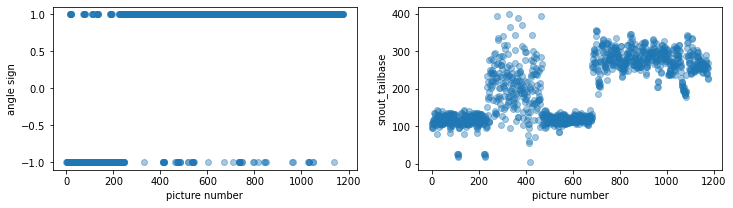

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
ind = range(df.shape[0])

axs[0].scatter(ind, features_fakedf['anglesign'], alpha=0.4)
axs[0].set (ylabel="angle sign")

axs[1].scatter(ind, features_fakedf['snout_tailbase'], alpha=0.4)
axs[1].set (ylabel="snout_tailbase")

for ax in axs.flat:
    ax.set(xlabel='picture number')


In [85]:
print((features_fakedf['anglesign'] < 0).sum())
print(features_fakedf.loc[(features_fakedf['anglesign'] < 0),'anglesign'])

258
labeled-data/m1s1/img0000.png   -1.0
labeled-data/m1s1/img0001.png   -1.0
labeled-data/m1s1/img0002.png   -1.0
labeled-data/m1s1/img0003.png   -1.0
labeled-data/m1s1/img0004.png   -1.0
                                ... 
labeled-data/m7s2/img0071.png   -1.0
labeled-data/m7s2/img0072.png   -1.0
labeled-data/m7s3/img0017.png   -1.0
labeled-data/m7s3/img0018.png   -1.0
labeled-data/m8s1/img0034.png   -1.0
Name: anglesign, Length: 258, dtype: float64


In [86]:
features_swapears = get_angle('angle',features_fakedf,fake_data, scorer, 'leftear', 'snout', 'rightear')
features_swapears.head(30)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
labeled-data/m1s1/img0000.png,18.648938,104.958540,9.706584,12.867573,99.090513,99.145070,-1.0,-110.624626
labeled-data/m1s1/img0001.png,22.040347,108.193126,11.333176,13.727183,104.399079,101.008796,-1.0,-122.876828
labeled-data/m1s1/img0002.png,20.056033,98.772926,12.333649,12.078401,91.915285,92.803561,-1.0,-110.478744
labeled-data/m1s1/img0003.png,23.484927,94.861556,10.592754,15.355354,90.000620,90.483036,-1.0,-128.733892
labeled-data/m1s1/img0004.png,23.077618,96.046864,11.949542,16.090197,90.298325,87.027378,-1.0,-109.900089
labeled-data/m1s1/img0005.png,23.284940,108.351460,13.604983,16.525825,101.792969,96.876210,-1.0,-100.765080
labeled-data/m1s1/img0006.png,23.704566,115.449537,12.293232,17.104340,109.895728,104.282227,-1.0,-106.327569
labeled-data/m1s1/img0007.png,23.086793,113.861832,14.425841,14.063175,109.051564,103.694646,-1.0,-108.258503
labeled-data/m1s1/img0008.png,19.487814,106.463679,12.256336,11.822981,101.013756,98.851574,-1.0,-108.045139
labeled-data/m1s1/img0009.png,25.744803,108.419659,13.207986,19.416488,99.476056,99.434322,-1.0,-102.537871


In [87]:
np.where((features_fakedf['anglesign'] < 0))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   22,   23,   24,   25,   26,   27,   28,
          29,   30,   31,   32,   33,   34,   35,   36,   37,   38,   39,
          40,   41,   42,   43,   44,   45,   46,   47,   48,   49,   50,
          51,   52,   53,   54,   55,   56,   57,   58,   59,   60,   61,
          62,   63,   64,   65,   66,   67,   68,   69,   70,   71,   79,
          80,   81,   82,   83,   84,   85,   86,   87,   88,   89,   90,
          91,   92,   93,   94,   95,   96,   97,   98,   99,  100,  101,
         102,  103,  104,  105,  106,  107,  108,  114,  115,  116,  117,
         118,  119,  120,  121,  122,  123,  124,  125,  126,  127,  128,
         136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  155,  156,  157,
         158,  159,  160,  161,  162,  163,  164,  165,  166,  167,  168,
         169,  170,  171,  172,  173, 

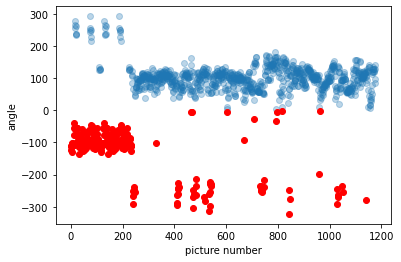

In [88]:
names_data = np.where((features_fakedf['anglesign'] > 0))
names_outliers = np.where((features_fakedf['anglesign'] < 0))
plt.scatter(names_data, features_fakedf.loc[(features_fakedf['anglesign'] > 0),'angle'], alpha=.3)
plt.scatter(names_outliers, features_fakedf.loc[(features_fakedf['anglesign'] < 0),'angle'], color='red')
plt.xlabel('picture number')
plt.ylabel('angle')
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler

x1 = StandardScaler().fit_transform(features_fakedf) # standart scaler
features_noise = pd.DataFrame(x1)
features_noise.columns = features_fakedf.columns

features_noise.head(25)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
0,-0.842488,-1.181182,-0.902712,-0.616398,-1.151925,-1.190931,-1.888357,-1.543485
1,-0.670319,-1.141408,-0.808222,-0.568339,-1.082837,-1.166263,-1.888357,-1.659611
2,-0.771055,-1.257245,-0.750104,-0.660519,-1.245307,-1.274867,-1.888357,-1.542103
3,-0.596983,-1.305342,-0.851234,-0.477312,-1.270226,-1.305581,-1.888357,-1.715124
4,-0.617660,-1.290767,-0.772417,-0.436228,-1.266351,-1.351320,-1.888357,-1.536618
5,-0.607135,-1.139461,-0.676252,-0.411873,-1.116754,-1.220962,-1.888357,-1.450037
6,-0.585833,-1.052178,-0.752452,-0.379529,-1.011301,-1.122936,-1.888357,-1.502758
7,-0.617195,-1.071701,-0.628568,-0.549555,-1.022287,-1.130714,-1.888357,-1.521060
8,-0.799902,-1.162674,-0.754595,-0.674800,-1.126895,-1.194816,-1.888357,-1.519037
9,-0.482257,-1.138622,-0.699313,-0.250262,-1.146908,-1.187103,-1.888357,-1.466840


In [90]:
'''x2 = StandardScaler().fit_transform(df_swap_ears) # standart scaler
features_swap_ears = pd.DataFrame(x2)
features_swap_ears.columns = df.columns
features_swap_ears.head()'''

'x2 = StandardScaler().fit_transform(df_swap_ears) # standart scaler\nfeatures_swap_ears = pd.DataFrame(x2)\nfeatures_swap_ears.columns = df.columns\nfeatures_swap_ears.head()'

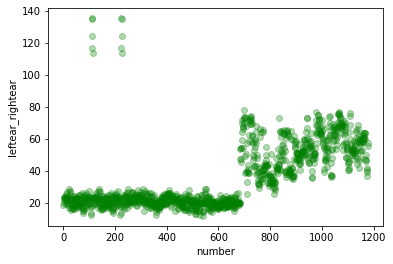

In [91]:
names = list(range(1, features_fakedf.shape[0]+1))
plt.scatter(names, features_fakedf['leftear_rightear'], alpha=.3, color='green')
plt.xlabel('number')
plt.ylabel('leftear_rightear')
plt.show()

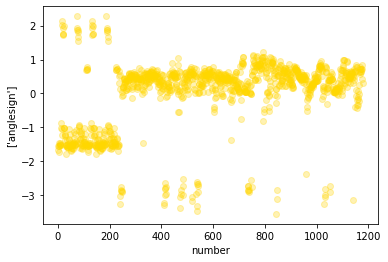

In [92]:
plt.scatter(names, features_noise[['angle']], alpha=.3, color='gold')
plt.xlabel('number')
plt.ylabel(['anglesign'])
plt.show()

In [93]:
from sklearn.decomposition import PCA

# PCA Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x1)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

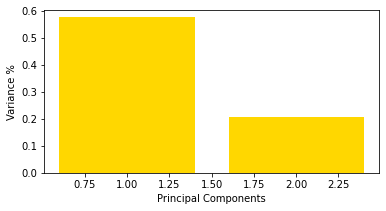

In [94]:
import matplotlib.pyplot as plt

# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)

plt.figure(figsize=(6, 3))
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')

plt.show()

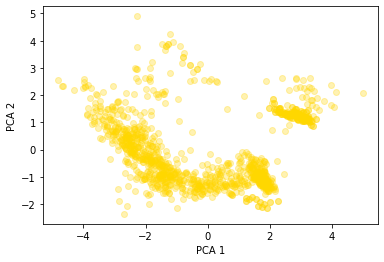

In [95]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [96]:
features_fakedf

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
labeled-data/m1s1/img0000.png,18.648938,104.958540,9.706584,12.867573,99.090513,99.145070,-1.0,-110.624626
labeled-data/m1s1/img0001.png,22.040347,108.193126,11.333176,13.727183,104.399079,101.008796,-1.0,-122.876828
labeled-data/m1s1/img0002.png,20.056033,98.772926,12.333649,12.078401,91.915285,92.803561,-1.0,-110.478744
labeled-data/m1s1/img0003.png,23.484927,94.861556,10.592754,15.355354,90.000620,90.483036,-1.0,-128.733892
labeled-data/m1s1/img0004.png,23.077618,96.046864,11.949542,16.090197,90.298325,87.027378,-1.0,-109.900089
...,...,...,...,...,...,...,...,...
labeled-data/m8s1/img0067.png,40.496983,238.613623,34.326008,9.745693,224.813000,234.010674,1.0,123.240825
labeled-data/m8s1/img0068.png,39.463862,228.205000,24.652541,17.179218,215.508383,227.140139,1.0,140.600022
labeled-data/m8s1/img0069.png,36.791714,225.674123,22.057757,18.822384,210.822517,224.018149,1.0,128.138771
labeled-data/m8s1/img0070.png,55.424337,255.727894,41.914896,31.076408,225.946928,239.925723,1.0,97.704534


In [152]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
data = features_fakedf
model.fit_predict(data)
labels = model.labels_
# labels


# PCA Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

x_data = PCA_components[0]
y_data = PCA_components[1]



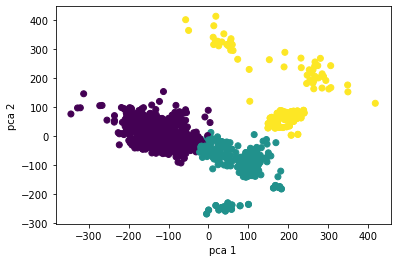

In [153]:
#plot_ind(x_data,y_data,labels,0)
plt.scatter(x_data, y_data, c=labels)
plt.xlabel('pca 1')
plt.ylabel('pca 2')
#for i, column in enumerate(data.columns):
#    plt.scatter(data.index, data[column], c=labels)
#plt.annotate(np.where(labels==0),  PCA_components.loc[(labels==0),0], PCA_components.loc[(labels==0),1])
plt.show()

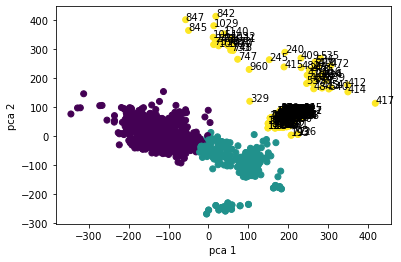

In [154]:
plot_ind(x_data,y_data,labels,2)
plt.scatter(x_data, y_data, c=labels)
plt.xlabel('pca 1')
plt.ylabel('pca 2')
#for i, column in enumerate(data.columns):
#    plt.scatter(data.index, data[column], c=labels)
#plt.annotate(np.where(labels==0),  PCA_components.loc[(labels==0),0], PCA_components.loc[(labels==0),1])
plt.show()

In [155]:
df.index[np.where(labels == 0)]

Index(['labeled-data/m1s2/img0007.png', 'labeled-data/m1s2/img0009.png',
       'labeled-data/m1s2/img0010.png', 'labeled-data/m1s2/img0020.png',
       'labeled-data/m1s2/img0021.png', 'labeled-data/m1s2/img0022.png',
       'labeled-data/m1s2/img0024.png', 'labeled-data/m1s2/img0025.png',
       'labeled-data/m1s2/img0026.png', 'labeled-data/m1s2/img0027.png',
       ...
       'labeled-data/m8s1/img0062.png', 'labeled-data/m8s1/img0063.png',
       'labeled-data/m8s1/img0064.png', 'labeled-data/m8s1/img0065.png',
       'labeled-data/m8s1/img0066.png', 'labeled-data/m8s1/img0067.png',
       'labeled-data/m8s1/img0068.png', 'labeled-data/m8s1/img0069.png',
       'labeled-data/m8s1/img0070.png', 'labeled-data/m8s1/img0071.png'],
      dtype='object', length=580)

In [156]:
df.index[np.where(labels == 2)]

Index(['labeled-data/m1s1/img0000.png', 'labeled-data/m1s1/img0001.png',
       'labeled-data/m1s1/img0002.png', 'labeled-data/m1s1/img0003.png',
       'labeled-data/m1s1/img0004.png', 'labeled-data/m1s1/img0005.png',
       'labeled-data/m1s1/img0006.png', 'labeled-data/m1s1/img0007.png',
       'labeled-data/m1s1/img0008.png', 'labeled-data/m1s1/img0009.png',
       ...
       'labeled-data/m6s2/img0024.png', 'labeled-data/m6s2/img0026.png',
       'labeled-data/m7s2/img0000.png', 'labeled-data/m7s2/img0069.png',
       'labeled-data/m7s2/img0070.png', 'labeled-data/m7s2/img0071.png',
       'labeled-data/m7s2/img0072.png', 'labeled-data/m7s3/img0017.png',
       'labeled-data/m7s3/img0018.png', 'labeled-data/m8s1/img0034.png'],
      dtype='object', length=250)

In [157]:
df.index[np.where(labels == 1)]

Index(['labeled-data/m1s1/img0015.png', 'labeled-data/m1s1/img0016.png',
       'labeled-data/m1s1/img0017.png', 'labeled-data/m1s1/img0018.png',
       'labeled-data/m1s1/img0019.png', 'labeled-data/m1s1/img0020.png',
       'labeled-data/m1s1/img0021.png', 'labeled-data/m1s1/img0072.png',
       'labeled-data/m1s1/img0073.png', 'labeled-data/m1s1/img0074.png',
       ...
       'labeled-data/m7s3/img0040.png', 'labeled-data/m7s3/img0041.png',
       'labeled-data/m7s3/img0042.png', 'labeled-data/m7s3/img0043.png',
       'labeled-data/m7s3/img0044.png', 'labeled-data/m7s3/img0045.png',
       'labeled-data/m7s3/img0046.png', 'labeled-data/m7s3/img0047.png',
       'labeled-data/m7s3/img0048.png', 'labeled-data/m7s3/img0049.png'],
      dtype='object', length=348)

In [106]:
print('mean: ', bodypart, 'x')
print(np.mean(df.loc[filenames,(scorer, bodypart, 'x')]))

print('mean: ', bodypart, 'y')
print(np.mean(df.loc[filenames,(scorer, bodypart, 'y')]) )

mean:  tailbase x
310.5606450924612
mean:  tailbase y
317.7413385490752


In [52]:

# plt.scatter(names,features_noise[['snout_tailbase']], c=labels)
# #plot_ind(features_noise,labels,1)
# #plt.annotate(np.where(labels==0),  PCA_components.loc[(labels==0),0], PCA_components.loc[(labels==0),1])
# plt.show()

In [51]:
'''
Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

The main concept of DBSCAN algorithm is to locate regions of high density 
that are separated from one another by regions of low density 

'''

'\nDensity-Based Spatial Clustering of Applications with Noise (DBSCAN)\n\nThe main concept of DBSCAN algorithm is to locate regions of high density \nthat are separated from one another by regions of low density \n\n'

In [111]:
def show_clusters(X, cluster):
    df = X
    df.loc[:,'label'] = cluster
    colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow', 4:'black', 5:'gold', 6:'lightblue', 7:'darkgreen'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
    plt.xlabel('pca 1')
    plt.ylabel('pca 2')
    plt.show()
    #, 1:'orange', 2:'green', 3:'yellow'

In [112]:
from sklearn.cluster import DBSCAN

# min_samples = the minimum number of core points needed in order to form a cluster
# eps = the maximum distance between two samples for them to be considered as in the same cluster

dbscan=DBSCAN(eps = 45, min_samples = 20)

# fit - perform DBSCAN clustering from features, or distance matrix.
dbscan = dbscan.fit(PCA_components)

In [113]:
cluster = dbscan.labels_
len(set(cluster))

4

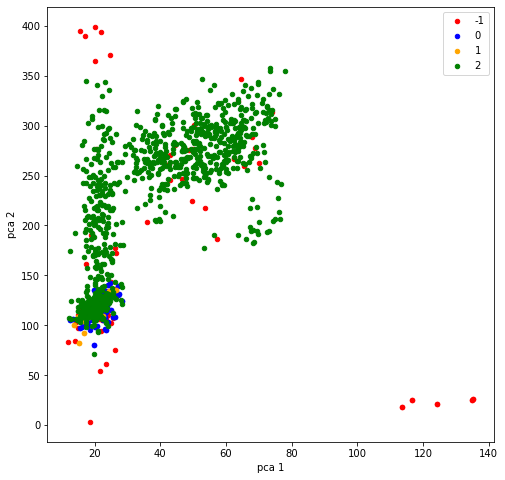

In [114]:
show_clusters(data, cluster)

In [115]:
data.index

Index(['labeled-data/m1s1/img0000.png', 'labeled-data/m1s1/img0001.png',
       'labeled-data/m1s1/img0002.png', 'labeled-data/m1s1/img0003.png',
       'labeled-data/m1s1/img0004.png', 'labeled-data/m1s1/img0005.png',
       'labeled-data/m1s1/img0006.png', 'labeled-data/m1s1/img0007.png',
       'labeled-data/m1s1/img0008.png', 'labeled-data/m1s1/img0009.png',
       ...
       'labeled-data/m8s1/img0062.png', 'labeled-data/m8s1/img0063.png',
       'labeled-data/m8s1/img0064.png', 'labeled-data/m8s1/img0065.png',
       'labeled-data/m8s1/img0066.png', 'labeled-data/m8s1/img0067.png',
       'labeled-data/m8s1/img0068.png', 'labeled-data/m8s1/img0069.png',
       'labeled-data/m8s1/img0070.png', 'labeled-data/m8s1/img0071.png'],
      dtype='object', length=1178)

In [116]:

features_noise.loc[0:6,:]


,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
0,-0.842488,-1.181182,-0.902712,-0.616398,-1.151925,-1.190931,-1.888357,-1.543485
1,-0.670319,-1.141408,-0.808222,-0.568339,-1.082837,-1.166263,-1.888357,-1.659611
2,-0.771055,-1.257245,-0.750104,-0.660519,-1.245307,-1.274867,-1.888357,-1.542103
3,-0.596983,-1.305342,-0.851234,-0.477312,-1.270226,-1.305581,-1.888357,-1.715124
4,-0.617660,-1.290767,-0.772417,-0.436228,-1.266351,-1.351320,-1.888357,-1.536618
5,-0.607135,-1.139461,-0.676252,-0.411873,-1.116754,-1.220962,-1.888357,-1.450037
6,-0.585833,-1.052178,-0.752452,-0.379529,-1.011301,-1.122936,-1.888357,-1.502758


In [117]:
(data['label'] == 0).sum()

200

In [118]:
(data['label'] == -1).sum()

72

In [119]:
(data['label'] == 1).sum()

28

In [120]:
features_noise

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
0,-0.842488,-1.181182,-0.902712,-0.616398,-1.151925,-1.190931,-1.888357,-1.543485
1,-0.670319,-1.141408,-0.808222,-0.568339,-1.082837,-1.166263,-1.888357,-1.659611
2,-0.771055,-1.257245,-0.750104,-0.660519,-1.245307,-1.274867,-1.888357,-1.542103
3,-0.596983,-1.305342,-0.851234,-0.477312,-1.270226,-1.305581,-1.888357,-1.715124
4,-0.617660,-1.290767,-0.772417,-0.436228,-1.266351,-1.351320,-1.888357,-1.536618
...,...,...,...,...,...,...,...,...
1173,0.266657,0.462336,0.527444,-0.790937,0.484292,0.594134,0.529561,0.673073
1174,0.214210,0.334344,-0.034493,-0.375343,0.363197,0.503196,0.529561,0.837602
1175,0.078554,0.303223,-0.185226,-0.283477,0.302212,0.461874,0.529561,0.719495
1176,1.024465,0.672786,0.968286,0.401622,0.499049,0.672425,0.529561,0.431042


In [121]:
print('swap cluster', np.where(data['label'] == 0))
print('outliers', np.where(data['label'] == -1))

swap cluster (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210

In [122]:
 data[data['label'] == 0].index

Index(['labeled-data/m1s1/img0000.png', 'labeled-data/m1s1/img0001.png',
       'labeled-data/m1s1/img0002.png', 'labeled-data/m1s1/img0003.png',
       'labeled-data/m1s1/img0004.png', 'labeled-data/m1s1/img0005.png',
       'labeled-data/m1s1/img0006.png', 'labeled-data/m1s1/img0007.png',
       'labeled-data/m1s1/img0008.png', 'labeled-data/m1s1/img0009.png',
       ...
       'labeled-data/m1s2/img0000.png', 'labeled-data/m1s2/img0001.png',
       'labeled-data/m1s2/img0002.png', 'labeled-data/m1s2/img0003.png',
       'labeled-data/m1s2/img0004.png', 'labeled-data/m1s2/img0005.png',
       'labeled-data/m1s2/img0006.png', 'labeled-data/m3s1/img0007.png',
       'labeled-data/m4s1/img0036.png', 'labeled-data/m4s1/img0102.png'],
      dtype='object', length=200)

In [123]:
 data[data['label'] == -1].index

Index(['labeled-data/m1s1/img0111.png', 'labeled-data/m1s1/img0112.png',
       'labeled-data/m1s1/img0113.png', 'labeled-data/m1s1/img0114.png',
       'labeled-data/m1s1/img0115.png', 'labeled-data/m1s1/img0111.png',
       'labeled-data/m1s1/img0112.png', 'labeled-data/m1s1/img0113.png',
       'labeled-data/m1s1/img0114.png', 'labeled-data/m1s1/img0115.png',
       'labeled-data/m1s2/img0012.png', 'labeled-data/m1s2/img0013.png',
       'labeled-data/m1s2/img0014.png', 'labeled-data/m1s2/img0015.png',
       'labeled-data/m1s2/img0016.png', 'labeled-data/m1s2/img0017.png',
       'labeled-data/m1s2/img0018.png', 'labeled-data/m1s2/img0052.png',
       'labeled-data/m1s2/img0100.png', 'labeled-data/m1s2/img0101.png',
       'labeled-data/m1s2/img0106.png', 'labeled-data/m2s1/img0025.png',
       'labeled-data/m2s1/img0042.png', 'labeled-data/m2s1/img0065.png',
       'labeled-data/m2s1/img0066.png', 'labeled-data/m2s1/img0067.png',
       'labeled-data/m2s1/img0068.png', 'labeled-da

In [124]:
data.head()

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle,label
labeled-data/m1s1/img0000.png,18.648938,104.958540,9.706584,12.867573,99.090513,99.145070,-1.0,-110.624626,0
labeled-data/m1s1/img0001.png,22.040347,108.193126,11.333176,13.727183,104.399079,101.008796,-1.0,-122.876828,0
labeled-data/m1s1/img0002.png,20.056033,98.772926,12.333649,12.078401,91.915285,92.803561,-1.0,-110.478744,0
labeled-data/m1s1/img0003.png,23.484927,94.861556,10.592754,15.355354,90.000620,90.483036,-1.0,-128.733892,0
labeled-data/m1s1/img0004.png,23.077618,96.046864,11.949542,16.090197,90.298325,87.027378,-1.0,-109.900089,0


In [132]:
23*0.6

13.799999999999999

In [140]:
int((data.shape[0] - (m+n))*0.6) + m + n


894

In [141]:
X_train = data.copy()
X_test = data.copy()
m_06 = int(m*0.6)
ds_06 = int((data.shape[0] - (m+n))*0.6) + m + n

X_train = X_train.drop(filenames[m_06:m])
X_train = X_train.drop(filenames[m+m_06:2*m])
X_train = X_train.drop(filenames[ds_06:data.shape[0]])


X_test = X_test.drop(filenames[0:m_06])
X_test = X_test.drop(filenames[m:m+m_06])
X_test = X_test.drop(filenames[2*m:ds_06])
# X_train.loc[0:14,:] = data.loc[filenames[0:14],:]
# X_train.loc[14:28,:] = data.loc[filenames[23:37],:]

In [142]:
X_test.shape

(385, 9)

In [143]:
X_train.shape

(619, 9)

In [144]:
Y_train = np.zeros(X_train.shape[0])
Y_train[0:m_06] = 1
Y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [145]:
Y_test = np.zeros(X_test.shape[0])
Y_test[0:m-m_06] = 1
Y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [146]:
#### LR

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

predicted_y1 = classifier.predict(X_train)
predicted_y2 = classifier.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
print('LR Accuracy (StandardScaler)')
print('test: {:.4f}'.format(roc_auc_score(Y_test,predicted_y2)))

LR Accuracy (StandardScaler)
test: 0.5712


In [148]:
for name, importance in zip(list(X_train), np.std(X_train.to_numpy(), 0)*classifier.coef_[0]):
    print(name, "=", importance)

leftear_rightear = -1.7543754188536798
snout_tailbase = 6.399477916443226
snout_leftear = -0.25646168832806376
snout_rightear = 0.24587830630563187
tailbase_leftear = -4.7323026803211805
tailbase_rightear = -0.3019228062468313
anglesign = -0.9118067607382644
angle = 1.10545366011473
label = -0.8941683283109537


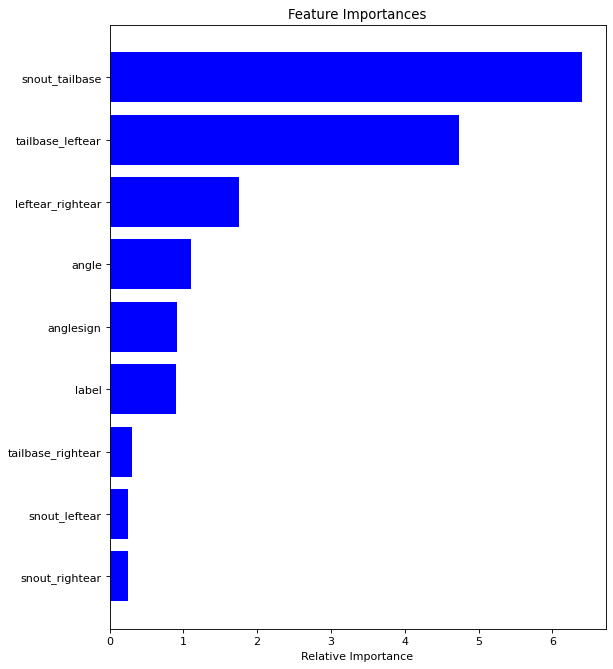

In [149]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

features = list(X_train)
importances = abs(np.std(X_train.to_numpy(), 0)*classifier.coef_[0])
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [46]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9782608695652174


In [115]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [105]:
mds = MDS(random_state=0)
X_transform = mds.fit_transform(x1)


In [106]:
stress = mds.stress_
print(stress)

2993.64125678587


In [108]:
dist_manhattan = manhattan_distances(x1)
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)

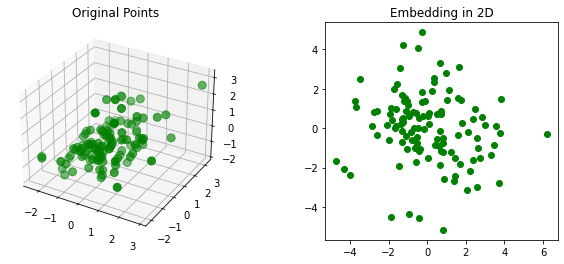

In [113]:

fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(x1[:,0], x1[:,1], zs=x1[:,3],s=64, c='green')
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], c='green')
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()